# Assignment 2: Regression and classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pydotplus

## Contributors:
### Lukas Andersson - XX Hours
### Ramapriya Navalpakkam - 15 hours

## 1.

### a.
COMMNET: Entries 25, 35, 46, 41, 10, 50, 20 were deleted on the second graph  

Coefficient: 30685.985917899194 Intercept: 1092324.212123067


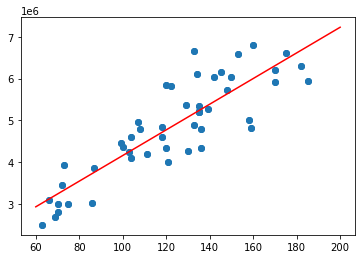

In [2]:
x = []
y = []

df = pd.read_csv('../data/data_assignment2_clean.csv')

for index, row in df.iterrows():
    x.append(row['Living_area'])
    y.append(row['Selling_price'])
    
plt.plot(x, y, 'o')
    
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)

x_lin_reg = np.linspace(60.0, 200.0, num=49)
y_lin_reg = predict(x_lin_reg)

plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

print("Coefficient: " + str(model[0]) + " Intercept: " + str(model[1]))

### b.  
  
The coefficient of the graph above is 30685.98591789919 while the intercept is 1092324.2121230674

### c.  
  
According to our predictions, the selling price of houses having living area 100 would be 4160922.803912986, 150 would be 5695222.099807946 and 200 would be 7229521.395702905.

In [3]:
predictions = [predict(100), predict(150), predict(200)]
               
print(predictions)

[4160922.803912986, 5695222.099807946, 7229521.395702906]


### d.

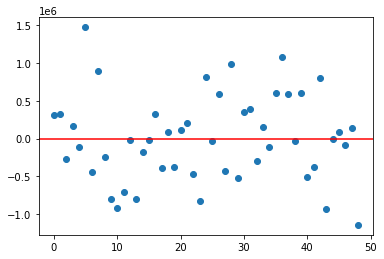

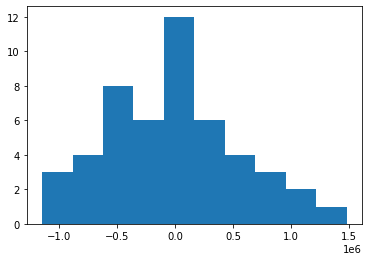

In [10]:
linspace = range(0, 49)

resy = []

for i in linspace:
    resy.append(y[i] - predict(x[i]))
    
plt.scatter(linspace, resy)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### e.

We can see that there is an even spread of residuals for the predicted values. Also, there is a good balance of residuals making the model, we can see that as the residuals lie almost symmetrically along the line of origin. We can see that the residuals show normality from the graph below that forms a bell curve. Therefore, there is enough evidence to say that  we have a god model in place.

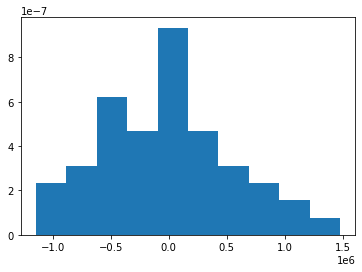

In [12]:
plt.hist(resy,bins=10,density=True)
plt.show()


## 2.



### a.
The Decision tree is generated for the Iris data set and show as below :

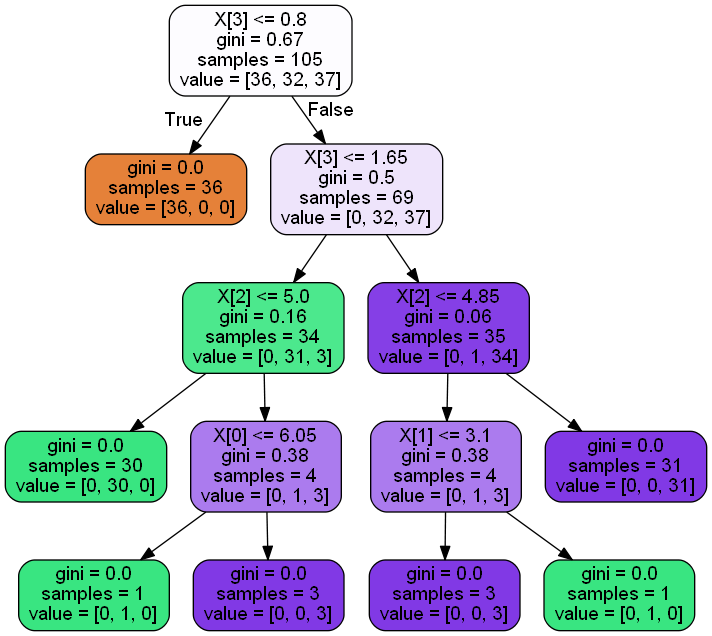

In [14]:
X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) #protesterar

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, rounded = True, proportion = False, precision = 2, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

The accuracy of the classification is evaluated using a confusion matrix


In [15]:
confusion_matrix(y_test, y_pred)


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

This datasets can be classified into 3 different types of irises namely Setosa, Versicolour, and Virginica. The confusion matrix checks if the predicted values align with the true values. The rows represent if the true values and the columns represent the predicted values. In the confusion matrix generated for the classification by the decision tree, we see that all the predicted values for the different classes correctly align with the true values. The values other than the diagonal are 0 which means there are no False positives or false negatives in the results obtained. Checking the accuracy of the model, we get 0.95 which is a 95% accurate model.

### b.


In [16]:
X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

k_list = [3, 19, 29, 39, 49, 69, 89, 105]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print("Accuracy of " + str(k) + " neighbors:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Accuracy of 3 neighbors: 0.9736842105263158
[[ 9  0  0]
 [ 0 16  1]
 [ 0  0 12]]
Accuracy of 19 neighbors: 0.9736842105263158
[[ 9  0  0]
 [ 0 16  1]
 [ 0  0 12]]
Accuracy of 29 neighbors: 0.9736842105263158
[[ 9  0  0]
 [ 0 16  1]
 [ 0  0 12]]
Accuracy of 39 neighbors: 0.9473684210526315
[[ 9  0  0]
 [ 0 16  1]
 [ 0  1 11]]
Accuracy of 49 neighbors: 0.9210526315789473
[[ 9  0  0]
 [ 0 15  2]
 [ 0  1 11]]
Accuracy of 69 neighbors: 0.7368421052631579
[[ 9  0  0]
 [ 1  7  9]
 [ 0  0 12]]
Accuracy of 89 neighbors: 0.6842105263157895
[[ 9  0  0]
 [ 1  5 11]
 [ 0  0 12]]
Accuracy of 105 neighbors: 0.5526315789473685
[[ 9  0  0]
 [ 8  0  9]
 [ 0  0 12]]


When K grows, after a certain threshold, it becomes more and more inaccurate. This is because when we make the number large enough it esentially looks at all data points when looking at neighbours, has nothing to do with where on the graph it is positioned it always has the same neighbours, defeating the whole purpose of KNN.

### c.

When we use a reasonable number on k in KNN, it seems to perform at close to exact the same level as our decision trees. In this case, the k=3 has an accuracy of 0.947, which basically is the same as the 95% accuarcy the trees had.

## 3.  

It is essential to have a test set for the reasons below :
- A model needs to be trained and then validated before it goes into production where it requires to work perfectly for the real-time data. The accuracy of the model can be evaluated only if there is a data set that the model can be tested on.
- If there are multiple models that need to be evaluated, having a test set where both models can be applied can say a lot about which model has a better performance than the other. So we can say that a test set is crucial to decide between models

COMMENT : You dont want to test on the same values you trained with since you are testing the exact case you trained the machine to solve
(Not sure about this but seems reasonable?)


